### Objective:
to generate data of degree 3 polynomial and fit models of degree 1, degree 3 and degree 13 polynomial and compare their performances.

### Tasks:
#### Task 1: Data generation
   - generate 500 samples of the target variable y using the equaton , y=0.5x^3-x^2+2 and add noise

   - Visualize the generated data points

#### Task 2: Polynomial regression (500 samples)
Fit polynomial regression models of the following degree to the generated data:(use polynomial features library from Scikit-learn)

   - Linnear Regression mode(Degree - 1)
   - polynomial Regression model (Degree - 3)
   - Polynomial Regression model (Degree - 13)
   - Compare the estimated model co-efficients to the actual ground truth equations
   - Evaluate the model performance using metrics: MSE , MAE, R^2

Generated data shape: (500, 1) (500, 1)


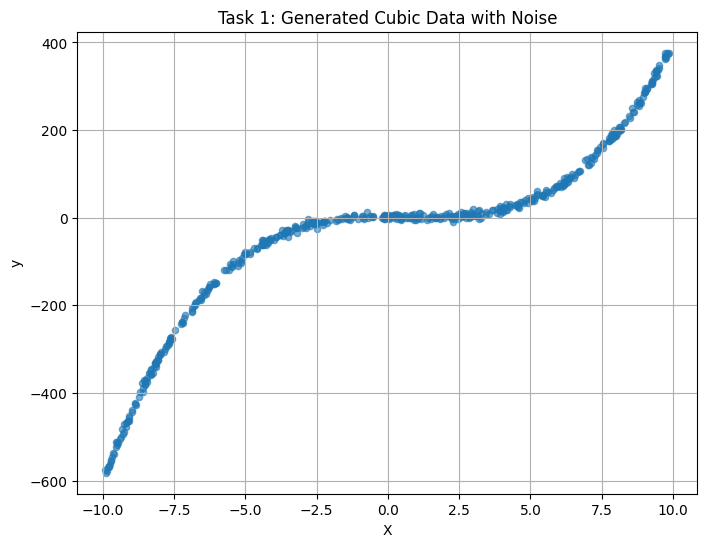

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)


# Generate input data
X = np.random.uniform(-10, 10, 500).reshape(-1, 1)

# Ground truth function
y_true = 0.5 * X**3 - X**2 + 2

# Add Gaussian noise
noise = np.random.normal(0, 5, size=(500, 1))
y = y_true + noise
print("Generated data shape:", X.shape, y.shape)
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X.ravel(), y.ravel(), s=20, alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Task 1: Generated Cubic Data with Noise")
plt.grid(True)
plt.show()


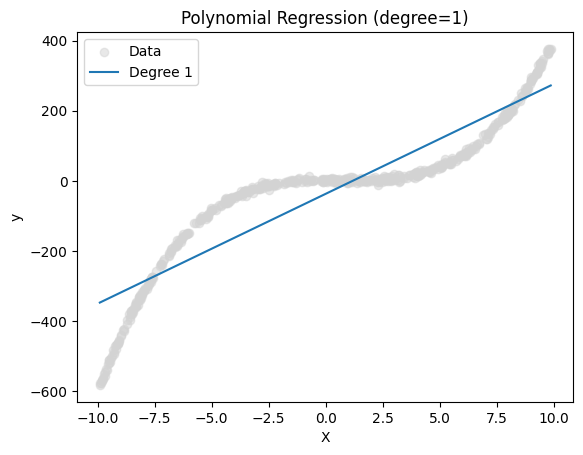

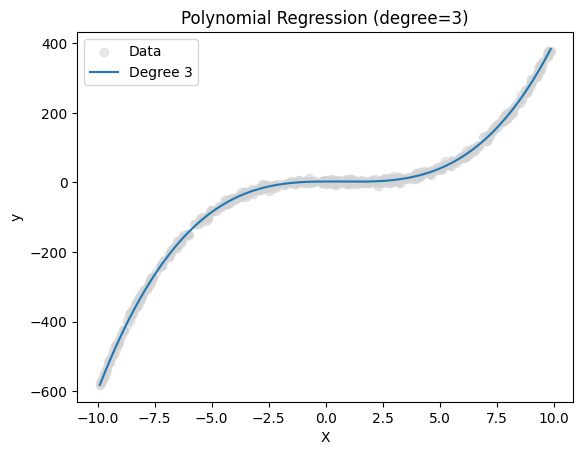

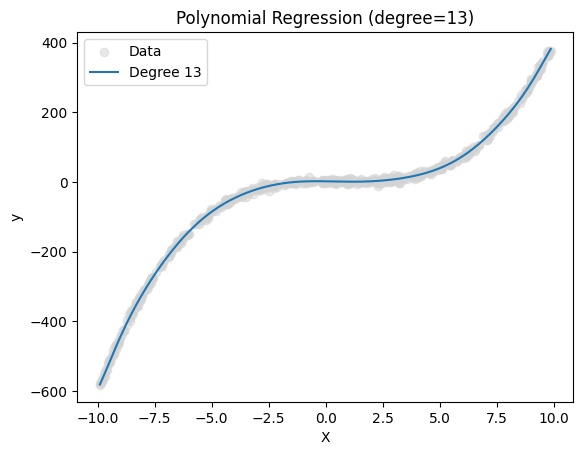


Polynomial Degree: 1
MSE: 6788.96
MAE: 69.33
R2 : 0.84

Polynomial Degree: 3
MSE: 25.01
MAE: 3.99
R2 : 1.00

Polynomial Degree: 13
MSE: 24.38
MAE: 3.91
R2 : 1.00


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to fit and evaluate polynomial regression
def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    # Performance metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    return model, y_pred, mse, mae, r2
# Fit models for degree 1, 3, and 13
degrees = [1, 3, 13]
results = {}
for d in degrees:
    model, y_pred, mse, mae, r2 = polynomial_regression(X, y, d)
    results[d] = {"model": model, "MSE": mse, "MAE": mae, "R2": r2}
    
    # Visualization
    plt.scatter(X, y, color='lightgray', alpha=0.5, label="Data")
    sorted_idx = X[:,0].argsort()
    plt.plot(X[sorted_idx], y_pred[sorted_idx], label=f"Degree {d}")
    plt.title(f"Polynomial Regression (degree={d})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.show()
# ======================================
# Task 3: Display Performance Metrics
# ======================================
for d in results:
    print(f"\nPolynomial Degree: {d}")
    print(f"MSE: {results[d]['MSE']:.2f}")
    print(f"MAE: {results[d]['MAE']:.2f}")
    print(f"R2 : {results[d]['R2']:.2f}")